In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
#reading the csv
df=pd.read_csv('final.csv')

In [3]:
df=df.sample(100000)

In [4]:
df.sort_values("Time",inplace=False)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,0,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
261,346141,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,1,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,1,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,im get crazi im look beatlejuic french version...
485,121041,131217,B00004RAMX,A5NQLNC6QPGSI,Kim Nason,7,8,1,965001600,End your Gopher Problems,I have just recently purchased the Woodstream ...,recent purchas woodstream corp 0610 gopher tra...
296,346102,374408,B00004CI84,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,1,970531200,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...,beetlejuic awe-inspir wonder amus comed romp e...
844,138000,149768,B00004S1C5,A7P76IGRZZBFJ,"E. Thompson ""Soooooper Genius""",18,18,1,975974400,Who Needs Wilton?,I'm sick of scads of nasty toothpicks all over...,im sick scad nasti toothpick counter im tint i...
845,138018,149790,B00004S1C6,A1IU7S4HCK1XK0,Joanna Daneman,25,27,1,982800000,Make your own Martha Stewart style cakes and c...,I don't know why anyone would ever use those l...,dont know anyon would ever use littl liquid fo...
342,346037,374339,B00004CI84,AZRJH4JFB59VC,Lynwood E. Hines,21,23,0,997228800,"Great movie, terrible DVD",I am continually amazed at the shoddy treatmen...,continu amaz shoddi treatment movi get dvd rel...
998,333930,361317,B00005IX96,A3ODTU118FKC5J,Rosemarie E Smith,5,7,1,1010275200,A little piece of heaven.,For years I have been trying to simulate a tru...,year tri simul truli italian espresso cappucci...


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df['CleanedText'],df['Score'],test_size=0.3,shuffle=False)

In [6]:
unigram=CountVectorizer()
bow_train=unigram.fit_transform(X_train)
bow_test=unigram.transform(X_test)

bow_train=preprocessing.normalize(bow_train)
bow_test=preprocessing.normalize(bow_test)

print("shape of train : ",bow_train.shape)
print("shape of test : ",bow_test.shape)

shape of train :  (70000, 45674)
shape of test :  (30000, 45674)


In [7]:
from sklearn.model_selection import TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=4)
for train,cv in tscv.split(bow_train):
    print(bow_train[train].shape,bow_train[cv].shape)

(14000, 45674) (14000, 45674)
(28000, 45674) (14000, 45674)
(42000, 45674) (14000, 45674)
(56000, 45674) (14000, 45674)


## Applying Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
clf=RandomForestClassifier(max_features='sqrt')
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=3,scoring='roc_auc')
gsv.fit(bow_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   40.8s
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 58.5min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [25]:
print("best params : ",gsv.best_params_)
print("best auc : ",gsv.best_score_)

best params :  {'max_depth': 500, 'n_estimators': 120}
best auc :  0.9160320870414664


In [10]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


In [19]:
train_auc

array([0.61276436, 0.70684853, 0.75410681, 0.7843087 , 0.80177745,
       0.81674671, 0.80316197, 0.85690403, 0.87213759, 0.8834499 ,
       0.88891627, 0.90014221, 0.86648497, 0.8988997 , 0.91561831,
       0.92143246, 0.93022259, 0.93137395, 0.98907995, 0.99493948,
       0.99661552, 0.99732872, 0.99743449, 0.99786455, 0.99908929,
       0.99978627, 0.99988816, 0.99995323, 0.99995059, 0.99995597,
       0.99999945, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999893, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [20]:
cv_auc

array([0.60332842, 0.69033136, 0.74287566, 0.77484038, 0.78645157,
       0.80684272, 0.781855  , 0.83022088, 0.84763401, 0.85799305,
       0.86010477, 0.87370818, 0.82742094, 0.85442487, 0.87119809,
       0.87531759, 0.88751977, 0.88701178, 0.87265759, 0.89124505,
       0.90154099, 0.90793491, 0.90730797, 0.91155417, 0.86923608,
       0.89566541, 0.9042002 , 0.90893482, 0.91149892, 0.91542835,
       0.87294814, 0.89587849, 0.90529499, 0.91191984, 0.91226908,
       0.91603209, 0.87224017, 0.89551423, 0.90606384, 0.91108224,
       0.91318509, 0.91537402])

In [14]:
gsv.cv_results_['params']

[{'max_depth': 1, 'n_estimators': 20},
 {'max_depth': 1, 'n_estimators': 40},
 {'max_depth': 1, 'n_estimators': 60},
 {'max_depth': 1, 'n_estimators': 80},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 1, 'n_estimators': 120},
 {'max_depth': 5, 'n_estimators': 20},
 {'max_depth': 5, 'n_estimators': 40},
 {'max_depth': 5, 'n_estimators': 60},
 {'max_depth': 5, 'n_estimators': 80},
 {'max_depth': 5, 'n_estimators': 100},
 {'max_depth': 5, 'n_estimators': 120},
 {'max_depth': 10, 'n_estimators': 20},
 {'max_depth': 10, 'n_estimators': 40},
 {'max_depth': 10, 'n_estimators': 60},
 {'max_depth': 10, 'n_estimators': 80},
 {'max_depth': 10, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 120},
 {'max_depth': 50, 'n_estimators': 20},
 {'max_depth': 50, 'n_estimators': 40},
 {'max_depth': 50, 'n_estimators': 60},
 {'max_depth': 50, 'n_estimators': 80},
 {'max_depth': 50, 'n_estimators': 100},
 {'max_depth': 50, 'n_estimators': 120},
 {'max_depth': 100, 'n_estimators': 20},
 {'

In [9]:
X=[1,1,1,1,1,1,5,5,5,5,5,5,10,10,10,10,10,10,50,50,50,50,50,50,100,100,100,100,100,100,500,500,500,500,500,500,1000,1000,1000,1000,1000,1000]
Y=[20,40,60,80,100,120,20,40,60,80,100,120,20,40,60,80,100,120,20,40,60,80,100,120,20,40,60,80,100,120,20,40,60,80,100,120,20,40,60,80,100,120]
print(len(X))

42


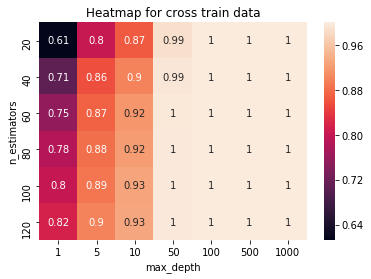

In [27]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

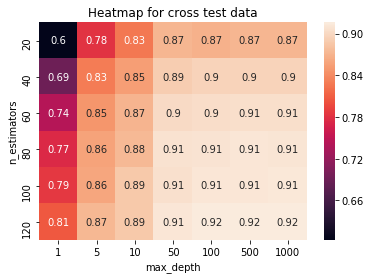

In [26]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross test data')
plt.show()

In [62]:
clf=RandomForestClassifier(max_features='sqrt',max_depth=10,n_estimators=80,class_weight='balanced')
clf.fit(bow_train,Y_train)
Y_pred1=clf.predict(bow_train)
Y_pred2=clf.predict(bow_test)

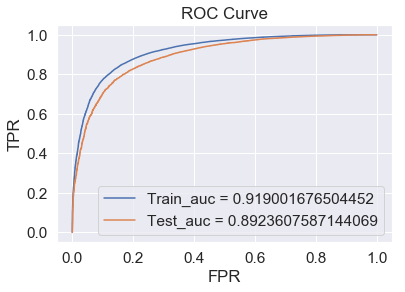

In [63]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(bow_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(bow_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

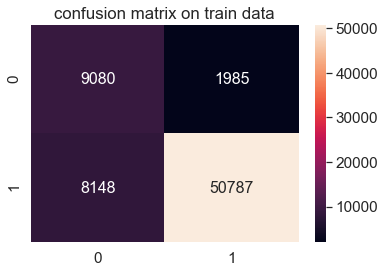

In [64]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

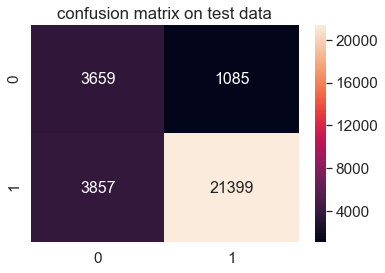

In [65]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

In [68]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


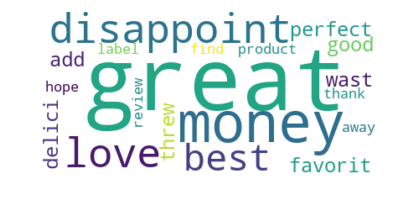

In [69]:
# Please write all the code with proper documentation
all_features = unigram.get_feature_names()
data=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# XGBoost on BoW 

In [6]:
unigram=CountVectorizer(min_df=10,max_features=500)
bow_train=unigram.fit_transform(X_train)
bow_test=unigram.transform(X_test)

bow_train=preprocessing.normalize(bow_train)
bow_test=preprocessing.normalize(bow_test)

print("shape of train : ",bow_train.shape)
print("shape of test : ",bow_test.shape)

shape of train :  (70000, 500)
shape of test :  (30000, 500)


In [7]:
from sklearn.model_selection import TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=4)
for train,cv in tscv.split(bow_train):
    print(bow_train[train].shape,bow_train[cv].shape)

(14000, 500) (14000, 500)
(28000, 500) (14000, 500)
(42000, 500) (14000, 500)
(56000, 500) (14000, 500)


In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
clf=XGBClassifier(booster='gbtree')

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(bow_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 152.9min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [10]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']

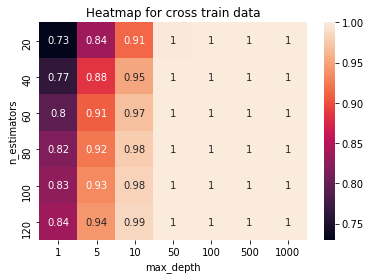

In [11]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

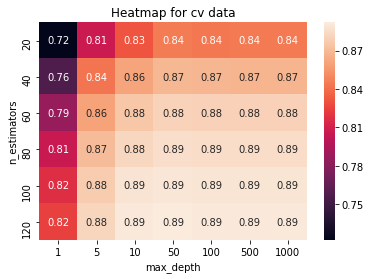

In [12]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cv data')
plt.show()

In [26]:
clf=XGBClassifier(booster='gbtree',max_depth=500,n_estimators=100,class_weight='balanced')
clf.fit(bow_train,Y_train)
Y_pred1=clf.predict(bow_train)
Y_pred2=clf.predict(bow_test)

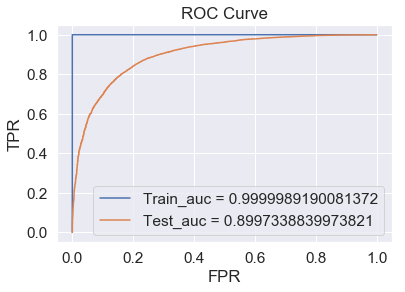

In [27]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(bow_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(bow_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

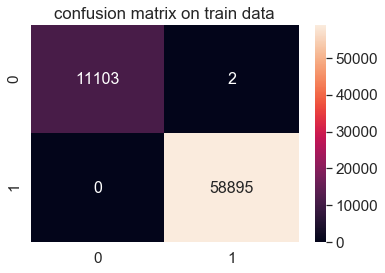

In [28]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

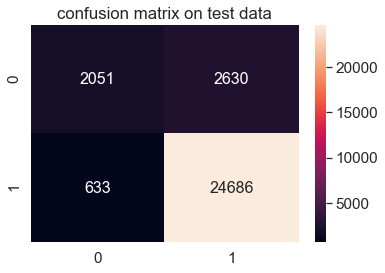

In [29]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

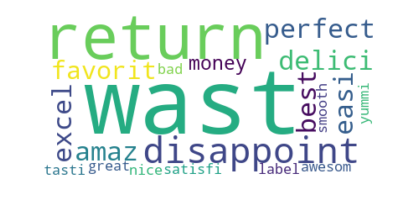

In [31]:
# Please write all the code with proper documentation
all_features = unigram.get_feature_names()
data=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Random Forest on Tfidf

In [6]:
tfidf=TfidfVectorizer()
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)

tfidf_train=preprocessing.normalize(tfidf_train)
tfidf_test=preprocessing.normalize(tfidf_test)

print("shape of train : ",tfidf_train.shape)
print("shape of test : ",tfidf_test.shape)

shape of train :  (70000, 45700)
shape of test :  (30000, 45700)


In [7]:
from sklearn.model_selection import TimeSeriesSplit

tscv=TimeSeriesSplit(n_splits=4)
for train,cv in tscv.split(tfidf_train):
    print(tfidf_train[train].shape,tfidf_train[cv].shape)

(14000, 45700) (14000, 45700)
(28000, 45700) (14000, 45700)
(42000, 45700) (14000, 45700)
(56000, 45700) (14000, 45700)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
clf=RandomForestClassifier(max_features='sqrt')
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(tfidf_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   44.0s
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 64.1min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [9]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


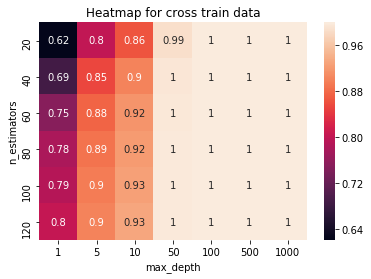

In [11]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

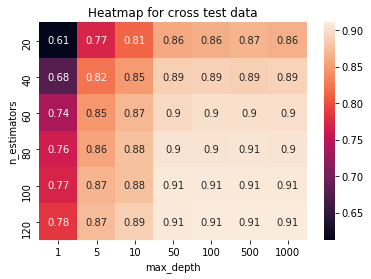

In [13]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross test data')
plt.show()

In [17]:
clf=RandomForestClassifier(max_features='sqrt',max_depth=50,n_estimators=60,class_weight='balanced')
clf.fit(tfidf_train,Y_train)
Y_pred1=clf.predict(tfidf_train)
Y_pred2=clf.predict(tfidf_test)

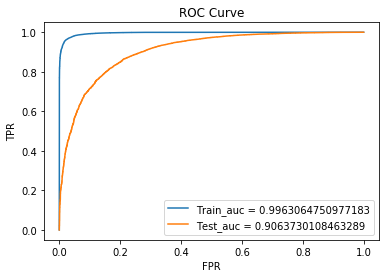

In [18]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(tfidf_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(tfidf_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

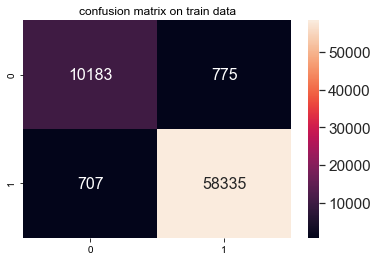

In [19]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

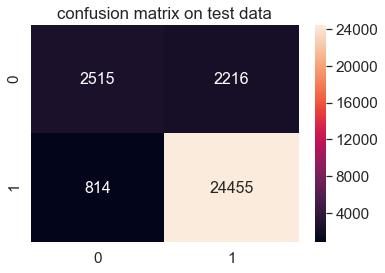

In [20]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

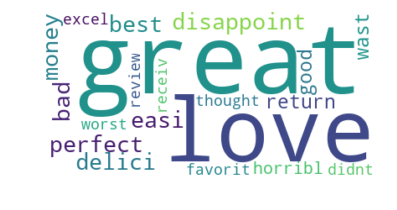

In [22]:
# Please write all the code with proper documentation
all_features = tfidf.get_feature_names()
data=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# XGBoost on Tfidf

In [30]:
tfidf=TfidfVectorizer(min_df=10,max_features=500)
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)

tfidf_train=preprocessing.normalize(tfidf_train)
tfidf_test=preprocessing.normalize(tfidf_test)

print("shape of train : ",tfidf_train.shape)
print("shape of test : ",tfidf_test.shape)

shape of train :  (70000, 500)
shape of test :  (30000, 500)


In [33]:
clf=XGBClassifier(booster='gbtree',class_weight='balanced')

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(tfidf_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 146.2min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [34]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']

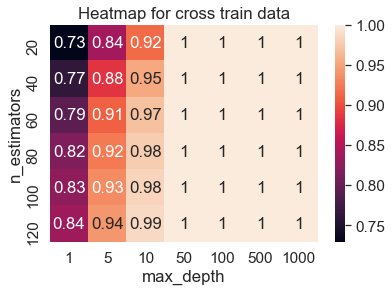

In [35]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

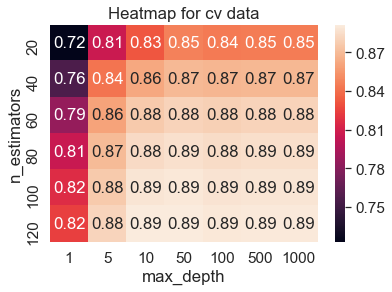

In [36]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cv data')
plt.show()

In [37]:
clf=XGBClassifier(booster='gbtree',max_depth=500,n_estimators=100,class_weight='balanced')
clf.fit(bow_train,Y_train)
Y_pred1=clf.predict(bow_train)
Y_pred2=clf.predict(bow_test)

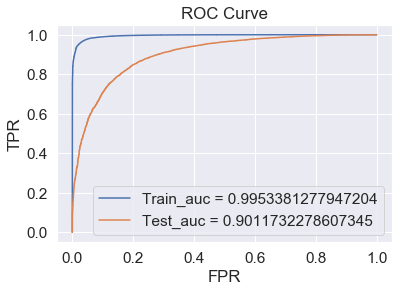

In [38]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(tfidf_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(tfidf_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

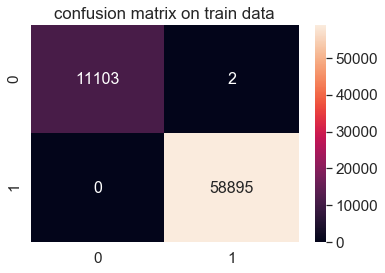

In [39]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

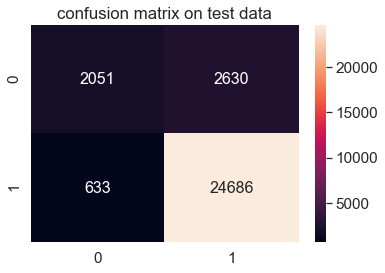

In [40]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

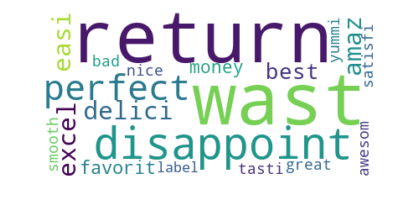

In [41]:
# Please write all the code with proper documentation
all_features = tfidf.get_feature_names()
data=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    data+=all_features[i]
    data+=' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word 2 Vec

In [27]:
i=0
list_of_sent_train=[]
for sent in X_train:
    list_of_sent_train.append(sent.split())
    
print(X_train.values[0])
print("******************************************************")
print(list_of_sent_train[0])

bought keurig coffe pack hard time find cafe mocha flavor met need multi pack allow favorit coffe time
******************************************************
['bought', 'keurig', 'coffe', 'pack', 'hard', 'time', 'find', 'cafe', 'mocha', 'flavor', 'met', 'need', 'multi', 'pack', 'allow', 'favorit', 'coffe', 'time']


In [29]:
i=0
list_of_sent_test=[]
for sent in X_test:
    list_of_sent_test.append(sent.split())
    
print(X_test.values[0])
print("******************************************************")
print(list_of_sent_test[0])

unless purpos cereal vehicl milk im confus anyon would choos healthier less sugari breakfast food first ingredi chocol fill fill first ingredi sugar next ingredi sugar get idea make serv size 3 4 cup serv cereal 120 calori clear bowl would hold twice least sugar--ther almost protein cereal impress array vitamin miner could obtain less-sweet enrich cereal one-a-day vitamin pill
******************************************************
['unless', 'purpos', 'cereal', 'vehicl', 'milk', 'im', 'confus', 'anyon', 'would', 'choos', 'healthier', 'less', 'sugari', 'breakfast', 'food', 'first', 'ingredi', 'chocol', 'fill', 'fill', 'first', 'ingredi', 'sugar', 'next', 'ingredi', 'sugar', 'get', 'idea', 'make', 'serv', 'size', '3', '4', 'cup', 'serv', 'cereal', '120', 'calori', 'clear', 'bowl', 'would', 'hold', 'twice', 'least', 'sugar--ther', 'almost', 'protein', 'cereal', 'impress', 'array', 'vitamin', 'miner', 'could', 'obtain', 'less-sweet', 'enrich', 'cereal', 'one-a-day', 'vitamin', 'pill']


In [31]:
from gensim.models import Word2Vec
w2v_model=Word2Vec(list_of_sent_train,min_count=5,size=50,workers=4)

C:\Users\ved\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [32]:
w2v_words=list(w2v_model.wv.vocab)
print("sample_words ",w2v_words[0:50])

sample_words  ['bought', 'keurig', 'coffe', 'pack', 'hard', 'time', 'find', 'cafe', 'mocha', 'flavor', 'met', 'need', 'multi', 'allow', 'favorit', 'cannot', 'drink', 'plain', 'water', 'get', 'enough', 'use', 'crystal', 'light', 'good', 'packet', 'im', 'go', 'quick', 'easi', 'order', 'ship', 'wonder', 'product', 'us', 'gluten', 'free', 'food', 'even', 'friend', 'famili', 'love', 'browni', 'havent', 'told', 'dont', 'know', 'differ', 'add', 'lot']


In [33]:
from tqdm import tqdm
sent_vectors_train=[]
for sent in tqdm(list_of_sent_train):
    sent_vec=np.zeros(50)
    cnt_words=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
    if cnt_words!=0:
        sent_vec/=cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:58<00:00, 391.23it/s]


70000
50


In [34]:
from tqdm import tqdm
sent_vectors_test=[]
for sent in tqdm(list_of_sent_test):
    sent_vec=np.zeros(50)
    cnt_words=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
    if cnt_words!=0:
        sent_vec/=cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:25<00:00, 350.19it/s]


30000
50


In [35]:
#normalize the avg w2v
sent_vectors_train=preprocessing.normalize(sent_vectors_train)
sent_vectors_test=preprocessing.normalize(sent_vectors_test)

print("shape of train ",sent_vectors_train.shape)
print("shape of test ",sent_vectors_test.shape)

shape of train  (70000, 50)
shape of test  (30000, 50)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
clf=RandomForestClassifier(max_features='sqrt')
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(sent_vectors_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 21.3min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [37]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


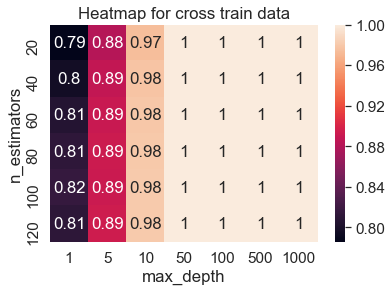

In [38]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

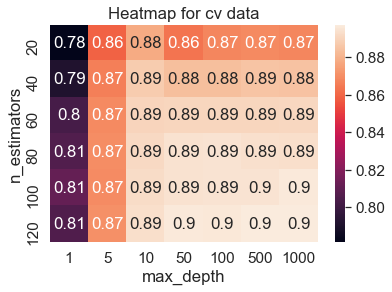

In [39]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cv data')
plt.show()

In [42]:
clf=RandomForestClassifier(max_features='sqrt',max_depth=10,n_estimators=40,class_weight='balanced')
clf.fit(sent_vectors_train,Y_train)
Y_pred1=clf.predict(sent_vectors_train)
Y_pred2=clf.predict(sent_vectors_test)

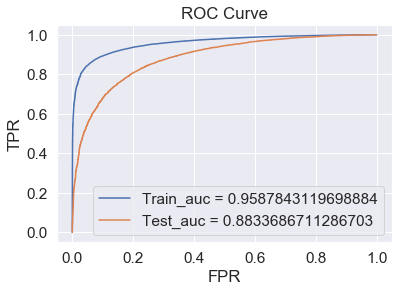

In [43]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(sent_vectors_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(sent_vectors_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

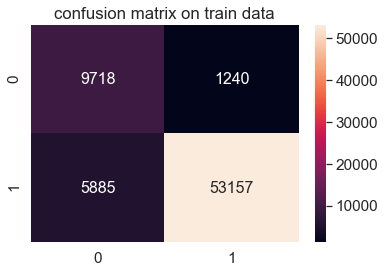

In [45]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

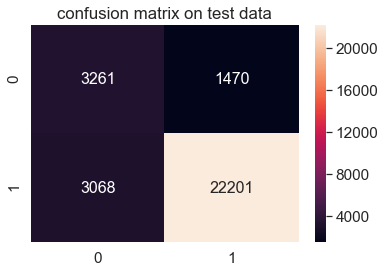

In [46]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

In [47]:
from xgboost import XGBClassifier
clf=XGBClassifier(booster='gbtree')

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(sent_vectors_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 82.1min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [48]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


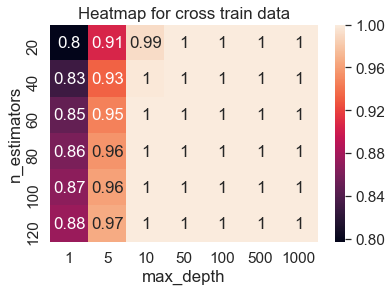

In [49]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

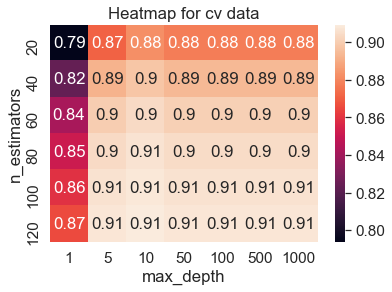

In [50]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC':cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cv data')
plt.show()

In [64]:
clf=XGBClassifier(booster='gbtree',max_depth=10,n_estimators=80,class_weight='balanced')
clf.fit(sent_vectors_train,Y_train)
Y_pred1=clf.predict(sent_vectors_train)
Y_pred2=clf.predict(sent_vectors_test)

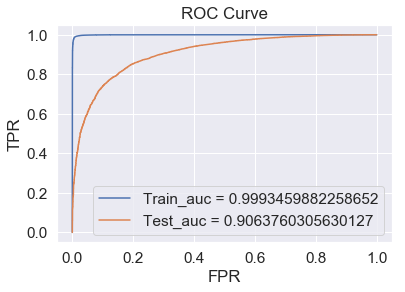

In [65]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(sent_vectors_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(sent_vectors_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

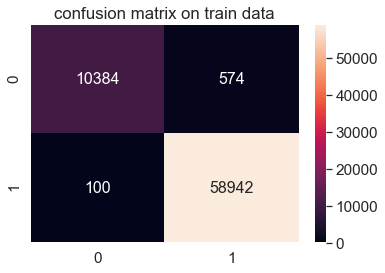

In [66]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

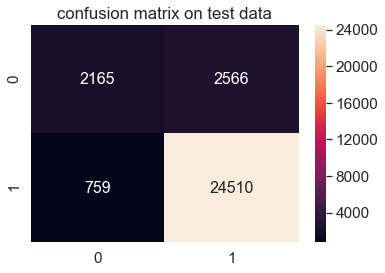

In [67]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

# Tfidf W2V

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(X_train.values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [71]:

tfidf_feat = model.get_feature_names()

tfidf_sent_vectors_train= []; 
row=0;
for sent in tqdm(list_of_sent_train):  
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            if word in dictionary:
                vec = w2v_model.wv[word]
             
                tf_idf = dictionary[word]*sent.count(word)
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:35<00:00, 449.65it/s]


In [72]:

#tfidf_feat = model.get_feature_names()

tfidf_sent_vectors_test= []; 
row=0;
for sent in tqdm(list_of_sent_test):  
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            if word in dictionary:
                vec = w2v_model.wv[word]
             
                tf_idf = dictionary[word]*sent.count(word)
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:21<00:00, 369.73it/s]


In [73]:
#normalize the tfidf w2v
tfidf_sent_vectors_train=preprocessing.normalize(tfidf_sent_vectors_train)
tfidf_sent_vectors_test=preprocessing.normalize(tfidf_sent_vectors_test)

print("shape of train ",tfidf_sent_vectors_train.shape)
print("shape of test ",tfidf_sent_vectors_test.shape)

shape of train  (70000, 50)
shape of test  (30000, 50)


In [74]:

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
clf=RandomForestClassifier(max_features='sqrt')
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(tfidf_sent_vectors_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 21.8min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [75]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


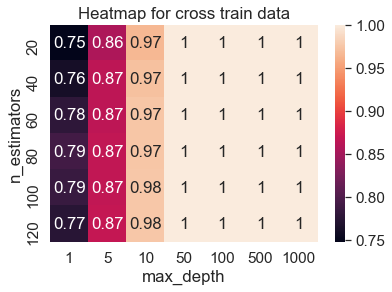

In [76]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

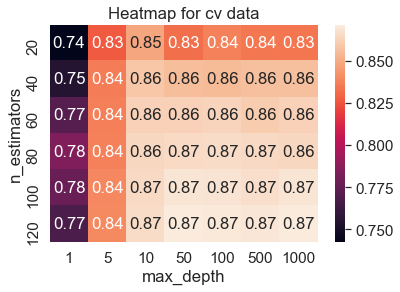

In [78]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cv data')
plt.show()

In [81]:
clf=RandomForestClassifier(max_features='sqrt',max_depth=10,n_estimators=80,class_weight='balanced')
clf.fit(sent_vectors_train,Y_train)
Y_pred1=clf.predict(tfidf_sent_vectors_train)
Y_pred2=clf.predict(tfidf_sent_vectors_test)

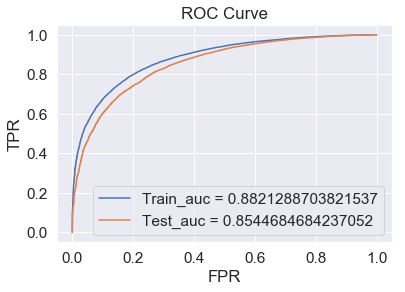

In [82]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(tfidf_sent_vectors_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(tfidf_sent_vectors_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

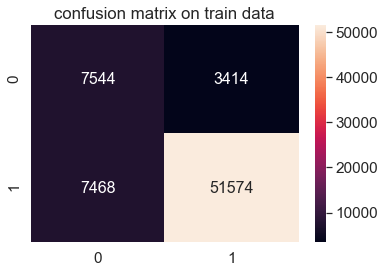

In [83]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

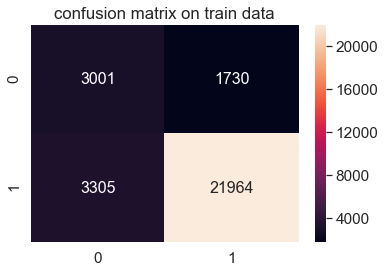

In [84]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

In [85]:
from xgboost import XGBClassifier
clf=XGBClassifier(booster='gbtree')

base_learners=[20,40,60,80,100,120]
max_depth=[1,5,10,50,100,500,1000]
param_grid={'n_estimators':base_learners,'max_depth':max_depth}
gsv=GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='roc_auc',n_jobs=3)
gsv.fit(tfidf_sent_vectors_train,Y_train)

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 168 out of 168 | elapsed: 95.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [86]:
train_auc=gsv.cv_results_['mean_train_score']
train_auc_std=gsv.cv_results_['std_train_score']
cv_auc=gsv.cv_results_['mean_test_score']
cv_auc_std=gsv.cv_results_['std_test_score']


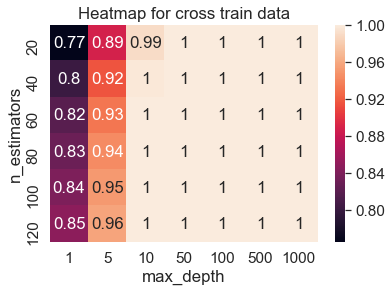

In [87]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

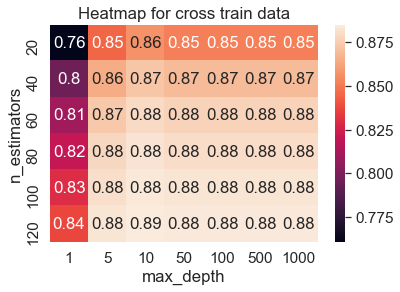

In [88]:
data = pd.DataFrame({'n_estimators':Y , 'max_depth': X, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross train data')
plt.show()

In [90]:
clf=XGBClassifier(booster='gbtree',max_depth=10,n_estimators=80,class_weight='balanced')
clf.fit(tfidf_sent_vectors_train,Y_train)
Y_pred1=clf.predict(tfidf_sent_vectors_train)
Y_pred2=clf.predict(tfidf_sent_vectors_test)

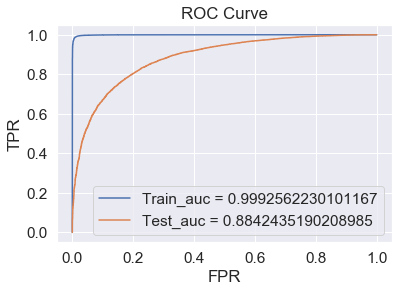

In [91]:
train_fpr,train_tpr,threshold=roc_curve(Y_train,clf.predict_proba(tfidf_sent_vectors_train)[:,1])
test_fpr,test_tpr,threshold=roc_curve(Y_test,clf.predict_proba(tfidf_sent_vectors_test)[:,1])

plt.plot(train_fpr,train_tpr,label="Train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test_auc = "+str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

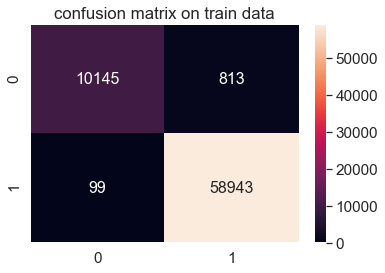

In [92]:
plt.title("confusion matrix on train data")
df_cm=pd.DataFrame(confusion_matrix(Y_train,Y_pred1),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

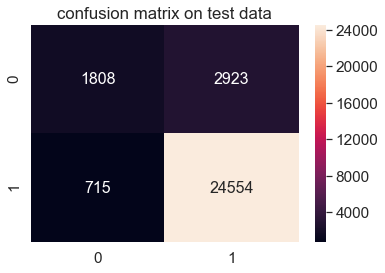

In [93]:
plt.title("confusion matrix on test data")
df_cm=pd.DataFrame(confusion_matrix(Y_test,Y_pred2),range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16},fmt='g')
plt.show()

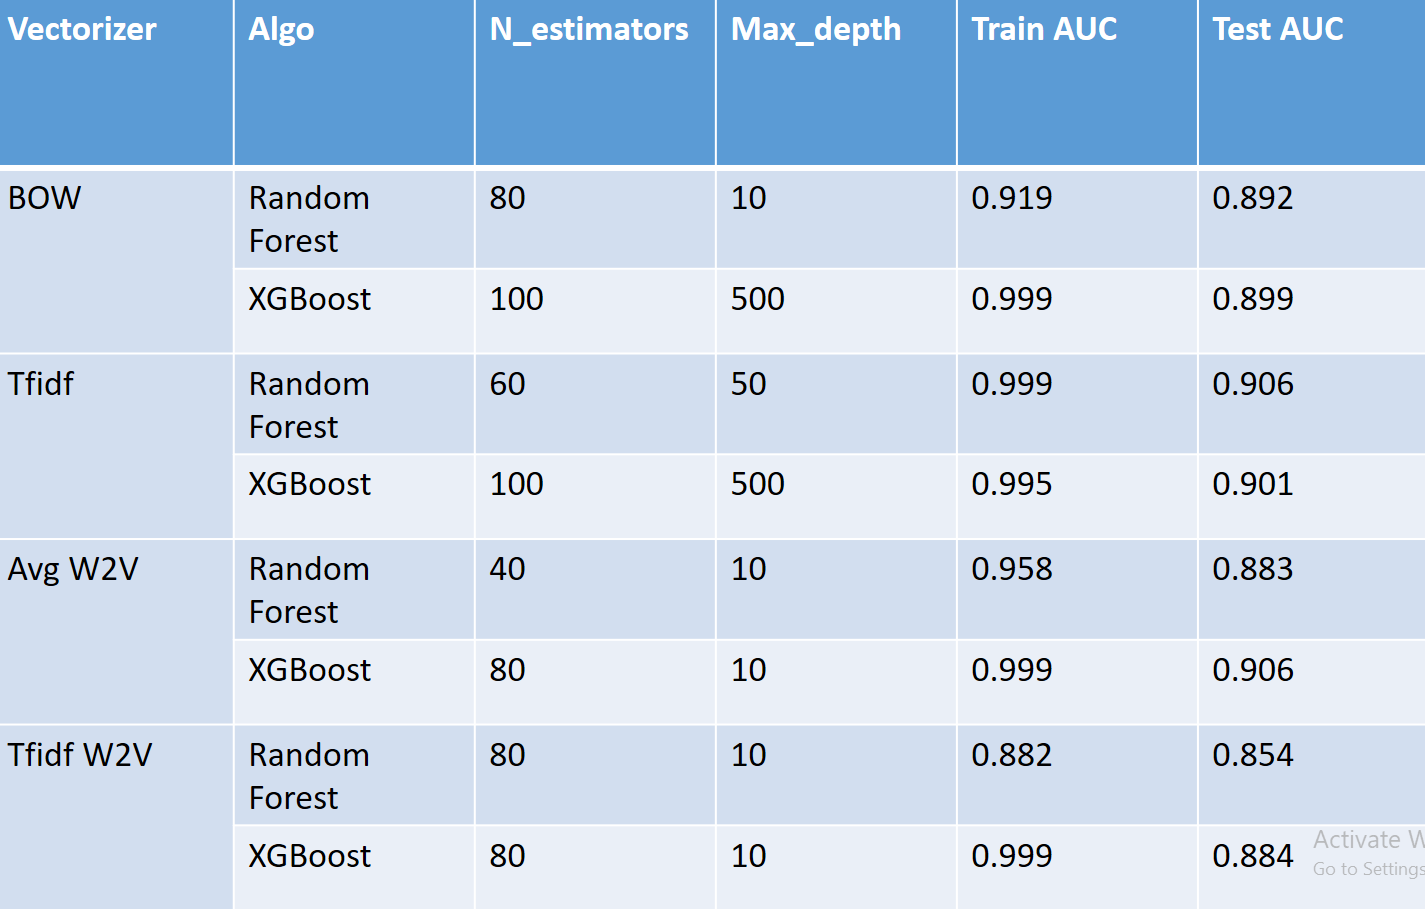

In [2]:
from IPython.display import Image
Image(filename="RF&XGB.png",height=500,width=500)